# Ch_12_Q10: PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

## Part (a)

Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [2]:
# Part (a): Generate simulated data with 60 observations, 50 variables, and 3 distinct classes
np.random.seed(42)

# Generate data for each class with a mean shift
class_1 = np.random.normal(loc=0, scale=1, size=(20, 50))
class_2 = np.random.normal(loc=5, scale=1, size=(20, 50))  # Shift the mean
class_3 = np.random.normal(loc=10, scale=1, size=(20, 50))  # Shift the mean further

# Combine into one dataset
data = np.vstack([class_1, class_2, class_3])
labels = np.array([0]*20 + [1]*20 + [2]*20)  # True class labels

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)

## Part (b)

Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

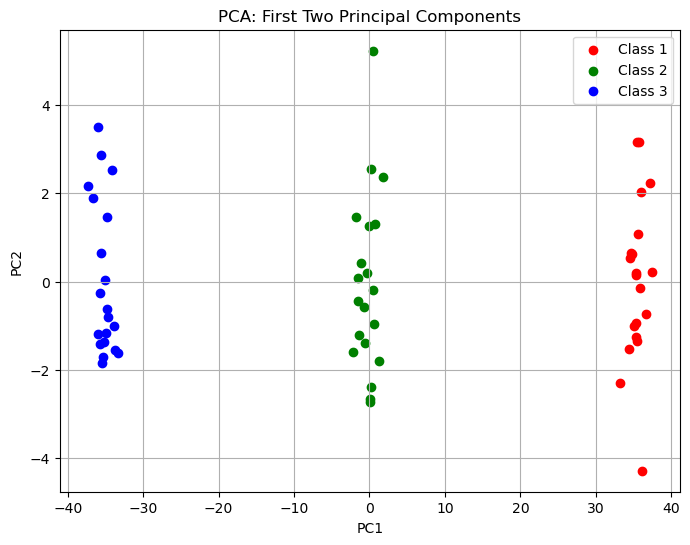

In [3]:
# Part (b): Perform PCA and plot the first two principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[labels == 0, 0], pca_result[labels == 0, 1], color='r', label='Class 1')
plt.scatter(pca_result[labels == 1, 0], pca_result[labels == 1, 1], color='g', label='Class 2')
plt.scatter(pca_result[labels == 2, 0], pca_result[labels == 2, 1], color='b', label='Class 3')
plt.title("PCA: First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

## Part (c)

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?  
Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [4]:
# Part (c): Perform K-means clustering with K = 3 and compare to true labels
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_3.fit(df)
kmeans_labels_3 = kmeans_3.labels_

# Compare K-means clusters with true labels using a crosstab
comparison_3 = pd.crosstab(labels, kmeans_labels_3, rownames=['True Class'], colnames=['K-means Cluster'])

# Display the crosstab
comparison_3

K-means Cluster,0,1,2
True Class,,,
0,0,0,20
1,20,0,0
2,0,20,0


The K-means clustering results show a **perfect classification**, even though the numeric labels differ:

- **True Class 0** is entirely assigned to **Cluster 2**.
- **True Class 1** is entirely assigned to **Cluster 0**.
- **True Class 2** is entirely assigned to **Cluster 1**.

Although the cluster numbers don't match the class labels, the classification is perfect since each class is grouped into one specific cluster.

## Part (d)

Perform K-means clustering with K = 2. Describe your results.

In [5]:
# Part (d): Perform K-means clustering with K = 2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_2.fit(df)
kmeans_labels_2 = kmeans_2.labels_

# Compare K-means clusters with true labels using a crosstab
comparison_2 = pd.crosstab(labels, kmeans_labels_2, rownames=['True Class'], colnames=['K-means Cluster'])

# Display the result
comparison_2

K-means Cluster,0,1
True Class,,
0,20,0
1,20,0
2,0,20


The K-means clustering results show **partial misclassification**:

- **True Class 0** is entirely assigned to **Cluster 0**.
- **True Class 1** is also entirely assigned to **Cluster 0**.
- **True Class 2** is entirely assigned to **Cluster 1**.

While **True Class 2** is perfectly classified, **True Class 0** and **True Class 1** are both grouped into the same cluster (**Cluster 0**), indicating that the algorithm failed to distinguish between these two classes.

## Part (e)

Now perform K-means clustering with K = 4, and describe your results.

In [6]:
# Part (e): Perform K-means clustering with K = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_4.fit(df)
kmeans_labels_4 = kmeans_4.labels_

# Compare K-means clusters with true labels using a crosstab
comparison_4 = pd.crosstab(labels, kmeans_labels_4, rownames=['True Class'], colnames=['K-means Cluster'])

# Display the result
comparison_4

K-means Cluster,0,1,2,3
True Class,,,,
0,0,0,20,0
1,8,0,0,12
2,0,20,0,0


The K-means clustering results show **partial misclassification**:

- **True Class 0** is entirely assigned to **Cluster 2**.
- **True Class 1** is split between **Cluster 0** (8 points) and **Cluster 3** (12 points).
- **True Class 2** is entirely assigned to **Cluster 1**.

While **True Class 0** and **True Class 2** are perfectly classified, **True Class 1** is divided across two clusters, indicating the clustering is not fully successful in separating all the classes correctly.

## Part (f)

Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [7]:
kmeans_pca_3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_pca_3.fit(pca_result)
kmeans_pca_labels_3 = kmeans_pca_3.labels_

# Compare the K-means clusters with the true class labels using the principal component scores
comparison_pca_3 = pd.crosstab(labels, kmeans_pca_labels_3, rownames=['True Class'], colnames=['K-means Cluster'])

# Display the result
comparison_pca_3

K-means Cluster,0,1,2
True Class,,,
0,0,0,20
1,20,0,0
2,0,20,0


The K-means clustering results on the first two principal component scores show a **perfect classification**, similar to the results obtained when clustering on the raw data:

- **True Class 0** is entirely assigned to **Cluster 2**.
- **True Class 1** is entirely assigned to **Cluster 0**.
- **True Class 2** is entirely assigned to **Cluster 1**.

### Comment on the Results:
Although the clustering was performed on the reduced \( 60 \times 2 \) PCA-reduced data, the K-means algorithm has successfully grouped each true class into distinct clusters without any misclassification. This suggests that the first two principal components capture the majority of the variance in the data and retain enough information for the clustering algorithm to effectively separate the classes. Therefore, reducing the data to two dimensions via PCA did not negatively impact the quality of the clustering, and the results remain **perfect**.

This is an indication that PCA can be used to reduce the dimensionality of the data while preserving its structure, making it easier for algorithms like K-means to achieve good results with fewer features.

## Part (g)

Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform K-means clustering on the scaled data with K = 3
kmeans_scaled_3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_scaled_3.fit(scaled_data)
kmeans_scaled_labels_3 = kmeans_scaled_3.labels_

# Compare K-means clustering on scaled data with true labels
comparison_scaled_3 = pd.crosstab(labels, kmeans_scaled_labels_3, rownames=['True Class'], colnames=['K-means Cluster'])

# Display the result
comparison_scaled_3

K-means Cluster,0,1,2
True Class,,,
0,0,0,20
1,20,0,0
2,0,20,0


After using **StandardScaler** and performing K-means clustering, the results are **identical** to part (b), showing a **perfect classification**:

- **True Class 0** is entirely in **Cluster 2**.
- **True Class 1** is entirely in **Cluster 0**.
- **True Class 2** is entirely in **Cluster 1**.

**Conclusion**: Scaling the variables didn't change the results, indicating that the raw data was already well-suited for K-means clustering.